In [41]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

pd.set_option("display.max_columns", None)

In [4]:
# load dataset
df = pd.read_csv("../data/weather_cleaned.csv")
df.head()

,city,lat,lon,temperature,weather_code,sunrise,sunset,moonrise,moonset,co,no2,o3,so2,pm2_5,pm10,wind_speed,wind_degree,wind_dir,pressure,precip,humidity,cloudcover,feelslike,uv_index,visibility
0,New Delhi,28.600,77.200,21,143,2025-12-25 07:05:00,2025-12-25 17:26:00,2025-12-25 01:04:00,2025-12-25 13:06:00,1411.85,23.95,264,76.65,137.25,140.05,4,34,NE,1017,0.0,53,50,21,0,1
1,Mumbai,18.975,72.826,30,122,2025-12-25 07:03:00,2025-12-25 18:03:00,2025-12-25 01:20:00,2025-12-25 13:29:00,644.85,25.55,209,31.15,46.65,47.05,18,300,WNW,1011,0.0,35,0,32,0,4
2,Kolkata,22.570,88.370,21,143,2025-12-25 06:07:00,2025-12-25 16:54:00,2025-12-25 00:16:00,2025-12-25 12:23:00,457.85,1.95,214,12.95,44.55,47.25,8,3,N,1014,0.0,73,0,21,0,3
3,Chennai,13.083,80.283,26,143,2025-12-25 06:22:00,2025-12-25 17:44:00,2025-12-25 00:48:00,2025-12-25 13:00:00,275.85,2.05,135,7.55,28.75,35.15,19,31,NNE,1012,0.0,65,25,28,0,5
4,Bengaluru,12.983,77.583,24,113,2025-12-25 06:32:00,2025-12-25 17:55:00,2025-12-25 00:59:00,2025-12-25 13:11:00,243.85,3.85,152,10.75,20.95,26.35,9,76,ENE,1015,0.0,25,0,24,0,10


In [6]:
# quick dataset review
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          74 non-null     object 
 1   lat           74 non-null     float64
 2   lon           74 non-null     float64
 3   temperature   74 non-null     int64  
 4   weather_code  74 non-null     int64  
 5   sunrise       74 non-null     object 
 6   sunset        74 non-null     object 
 7   moonrise      74 non-null     object 
 8   moonset       74 non-null     object 
 9   co            74 non-null     float64
 10  no2           74 non-null     float64
 11  o3            74 non-null     int64  
 12  so2           74 non-null     float64
 13  pm2_5         74 non-null     float64
 14  pm10          74 non-null     float64
 15  wind_speed    74 non-null     int64  
 16  wind_degree   74 non-null     int64  
 17  wind_dir      74 non-null     object 
 18  pressure      74 non-null     in

,lat,lon,temperature,weather_code,co,no2,o3,so2,pm2_5,pm10,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,feelslike,uv_index,visibility
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,74.000000
mean,24.303824,76.853392,22.689189,125.283784,526.498649,6.041892,169.256757,24.587838,48.952703,50.395946,7.297297,162.864865,1014.594595,0.002703,38.702703,24.297297,22.472973,0.0,7.432432
std,5.329883,6.824777,4.948850,19.601174,355.657039,5.530903,40.386510,15.250463,41.487027,42.537311,3.887915,130.955741,2.558461,0.023250,17.554401,36.581577,5.184865,0.0,3.314894
min,6.133000,68.968000,-1.000000,113.000000,132.850000,0.850000,39.000000,1.950000,5.750000,5.850000,4.000000,2.000000,1009.000000,0.000000,13.000000,0.000000,-6.000000,0.0,1.000000
25%,20.941500,73.162500,20.000000,113.000000,265.100000,2.150000,146.500000,13.675000,19.250000,20.400000,4.000000,37.250000,1013.000000,0.000000,26.250000,0.000000,20.000000,0.0,5.000000
50%,23.308500,75.841500,23.000000,122.000000,333.850000,4.600000,163.500000,19.850000,26.800000,27.050000,6.000000,100.000000,1015.000000,0.000000,35.000000,0.000000,23.000000,0.0,10.000000
75%,28.592500,77.658000,26.000000,137.750000,775.100000,8.300000,198.750000,31.150000,76.000000,80.250000,9.000000,305.500000,1016.000000,0.000000,48.000000,50.000000,26.000000,0.0,10.000000
max,37.200000,118.550000,31.000000,248.000000,1591.850000,25.550000,264.000000,76.650000,138.250000,141.950000,19.000000,357.000000,1028.000000,0.200000,89.000000,100.000000,32.000000,0.0,10.000000


In [8]:
# final missing values check
df.isna().sum().sort_values(ascending=False)

city            0
pm2_5           0
uv_index        0
feelslike       0
cloudcover      0
humidity        0
precip          0
pressure        0
wind_dir        0
wind_degree     0
wind_speed      0
pm10            0
so2             0
lat             0
o3              0
no2             0
co              0
moonset         0
moonrise        0
sunset          0
sunrise         0
weather_code    0
temperature     0
lon             0
visibility      0
dtype: int64

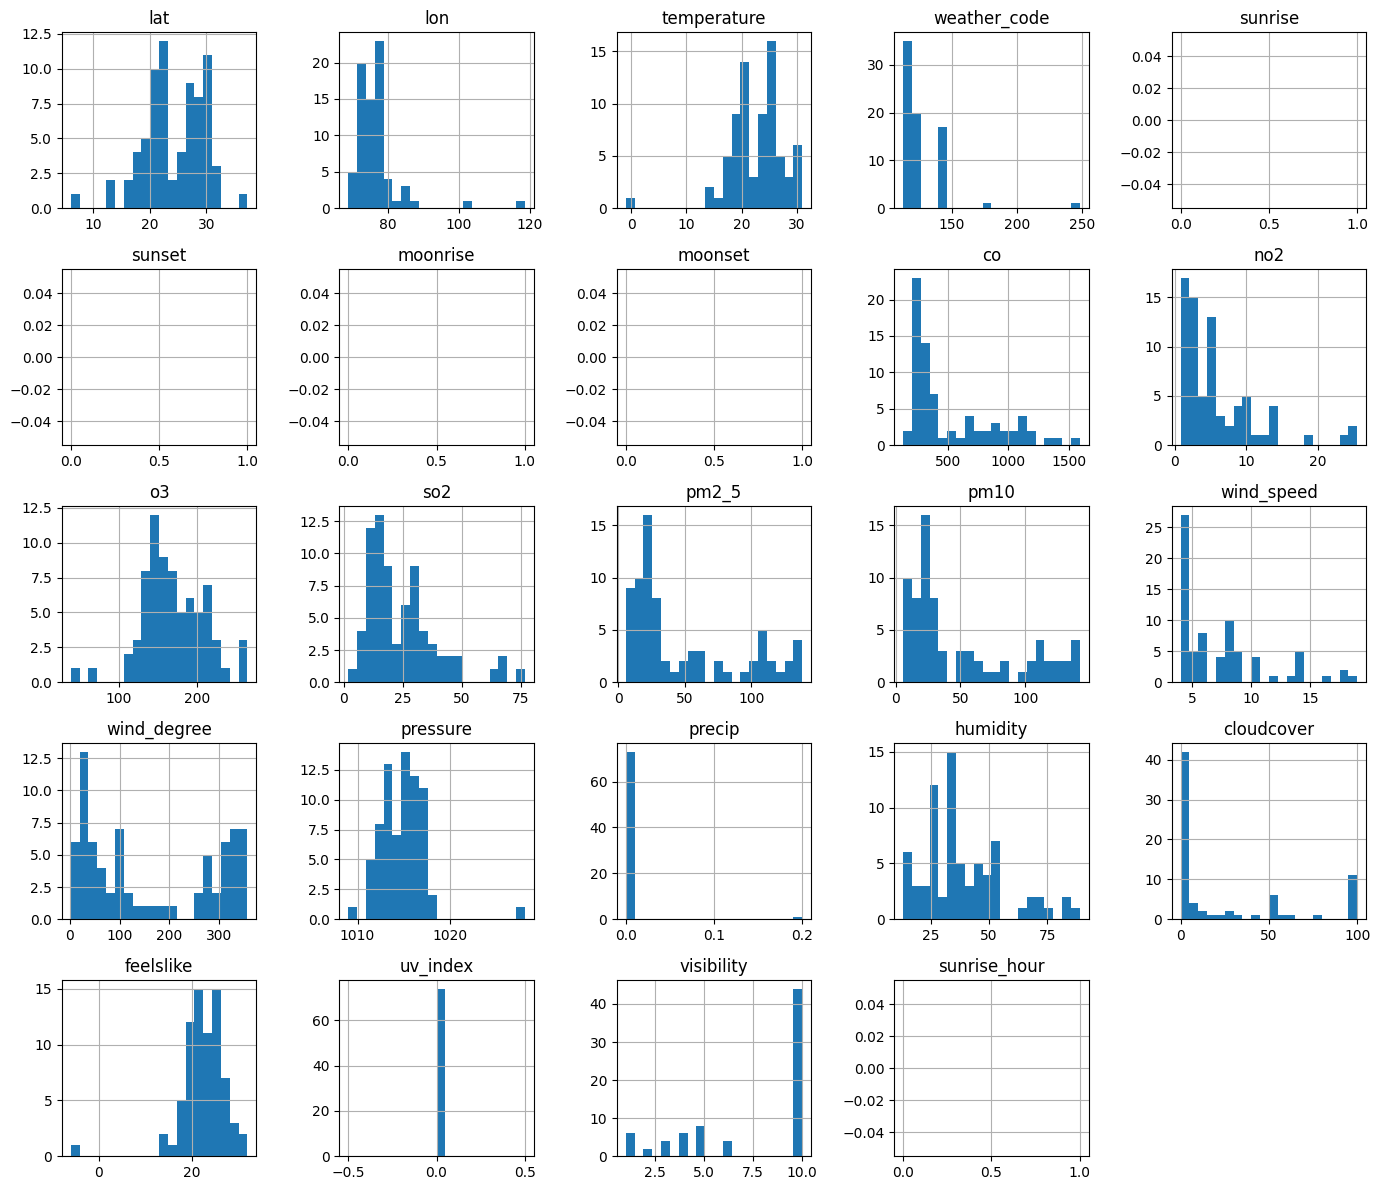

In [44]:
# univariate distribution
df.hist(figsize=(14, 12), bins=20)
plt.tight_layout()
plt.title("Distribution of Numeric Variables")

#save to output folder
plt.savefig("../output/Dist_Num_Var.png", dpi=300, bbox_inches='tight')
plt.show()

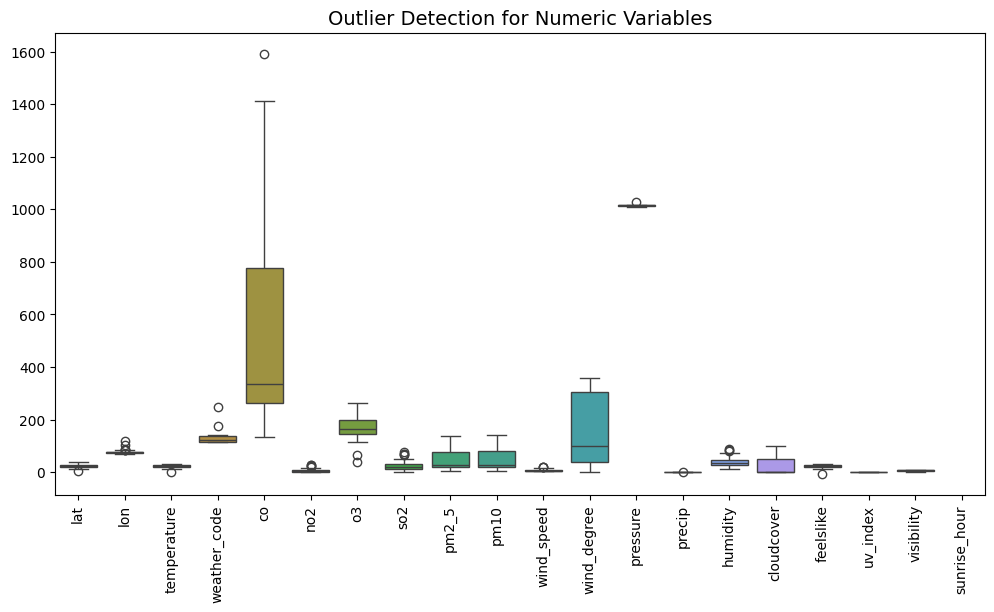

In [45]:
# boxplots(outliers check)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include="number"))
plt.xticks(rotation=90)
plt.title("Outlier Detection for Numeric Variables", fontsize=14)
#save to output folder
plt.savefig("../output/Outlier_detection.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
## categorical exploration
# city counts
df["city"].value_counts()

city
Mumbai       2
Vadodara     2
New Delhi    1
Porbandar    1
Junagadh     1
            ..
Noida        1
Ghaziabad    1
Meerut       1
Mathura      1
Ratnagiri    1
Name: count, Length: 72, dtype: int64

In [12]:
# wind direction
df["wind_dir"].value_counts()

wind_dir
NNE    11
NNW    11
NE      9
WNW     7
E       7
NW      7
N       6
ENE     5
W       3
ESE     3
S       2
SE      2
SSW     1
Name: count, dtype: int64

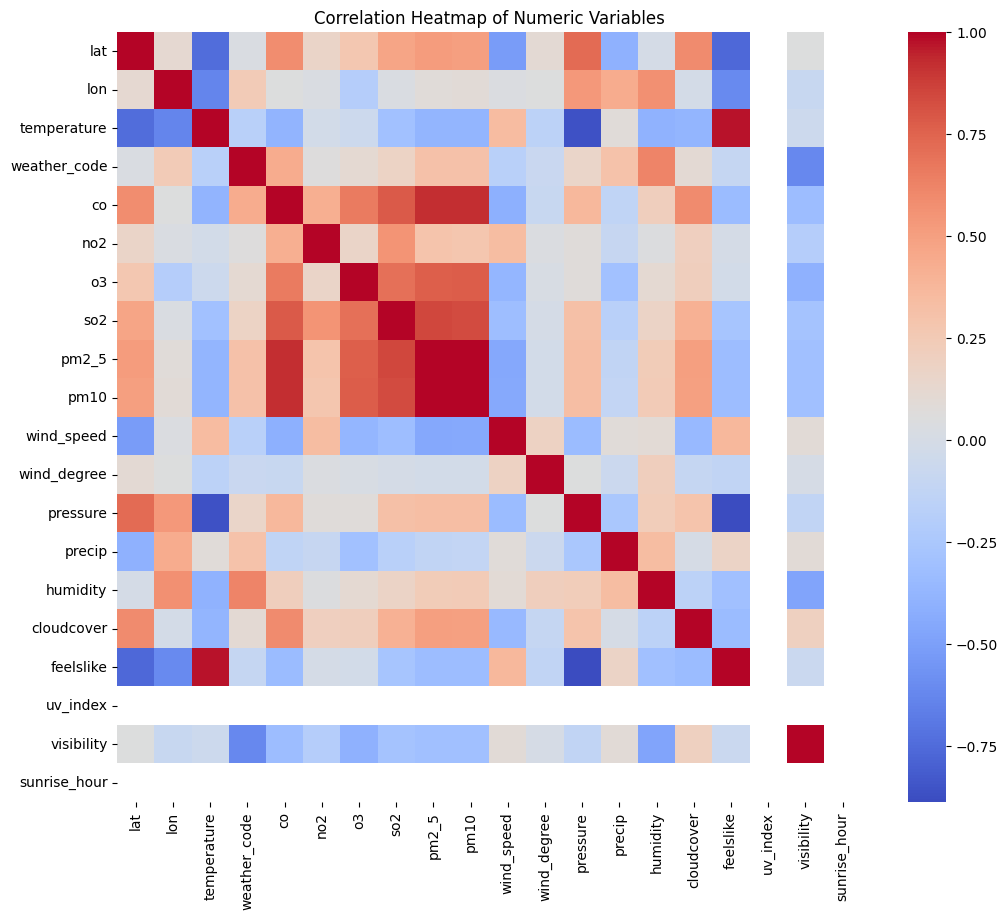

In [46]:
## correlation matrix
# heatmap
corr =df.select_dtypes(include="number").corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Variables")
#save to output folder
plt.savefig("../output/Correlation_Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [15]:
## target-focused analysis
# relationship with weather
target = "pm2_5"
df.select_dtypes(include="number").corr()[target].sort_values(ascending=False)

pm2_5           1.000000
pm10            0.999384
co              0.925471
so2             0.845282
o3              0.771357
lat             0.517325
cloudcover      0.502243
pressure        0.336156
weather_code    0.312496
no2             0.296477
humidity        0.239594
lon             0.081485
wind_degree    -0.021113
precip         -0.122429
visibility     -0.307310
feelslike      -0.327505
temperature    -0.378636
wind_speed     -0.456269
uv_index             NaN
Name: pm2_5, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

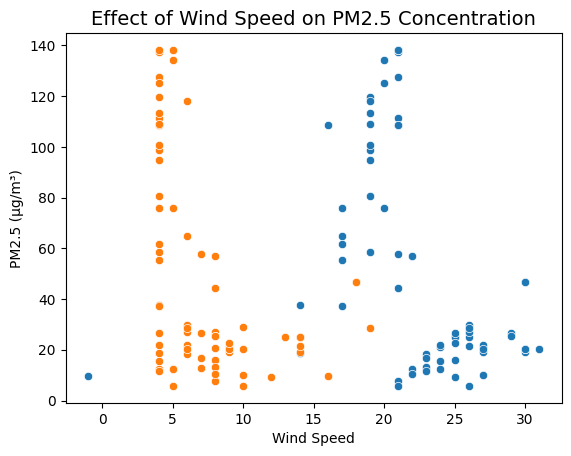

In [47]:
# scatter relationships
sns.scatterplot(data=df, x="temperature", y="pm2_5")
plt.title("Relationship between Temperature and PM2.5", fontsize=14)
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show

sns.scatterplot(data=df, x="wind_speed", y="pm2_5")
plt.title("Effect of Wind Speed on PM2.5 Concentration", fontsize=14)
plt.xlabel("Wind Speed")
plt.ylabel("PM2.5 (µg/m³)")
#save to output folder
plt.savefig("../output/Effect_windspeed_temp.png", dpi=300, bbox_inches='tight')
plt.show

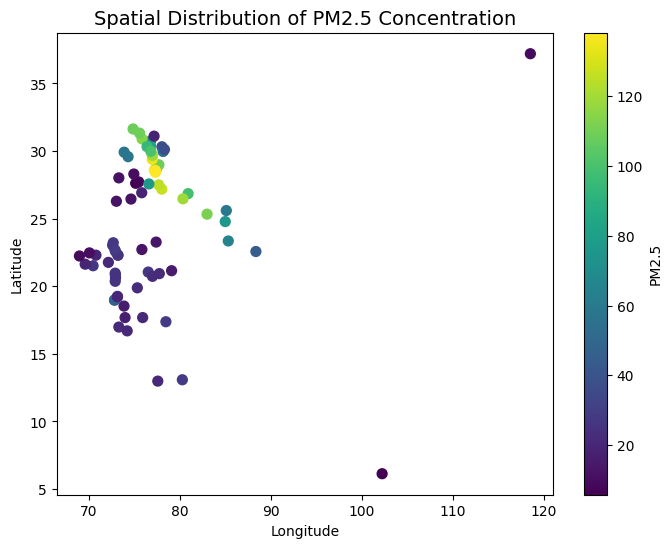

In [48]:
# spatial patterns
plt.figure(figsize=(8, 6))
plt.scatter(df["lon"], df["lat"], c=df["pm2_5"], s=50)
plt.colorbar(label="PM2.5")
plt.title("Spatial Distribution of PM2.5 Concentration", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#save to output folder
plt.savefig("../output/Spatial_Distr.png", dpi=300, bbox_inches='tight')
plt.show()

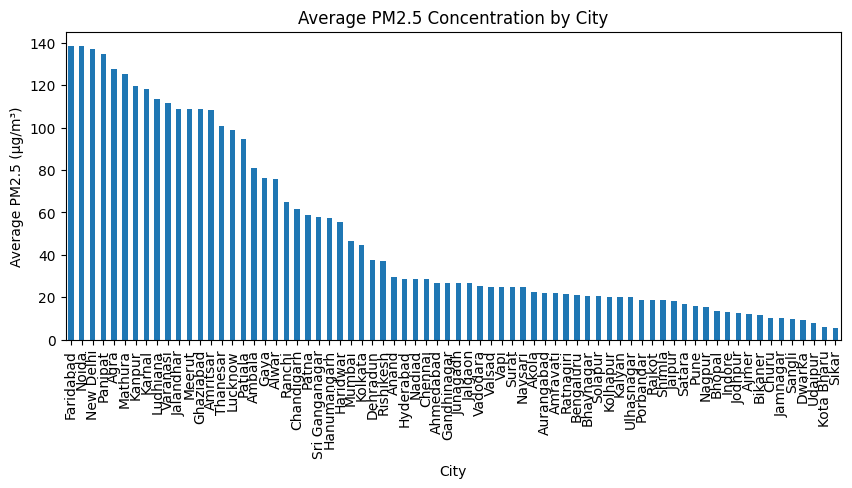

In [49]:
# group comparison
df.groupby("city")["pm2_5"].mean().sort_values(ascending=False).plot(
    kind="bar",
    figsize=(10, 4),
    title="Average PM2.5 Concentration by City"
)
plt.ylabel("Average PM2.5 (µg/m³)")
plt.xlabel("City")
#save to output folder
plt.savefig("../output/Avg_PM2.5_Conc.png", dpi=300, bbox_inches='tight')
plt.show()

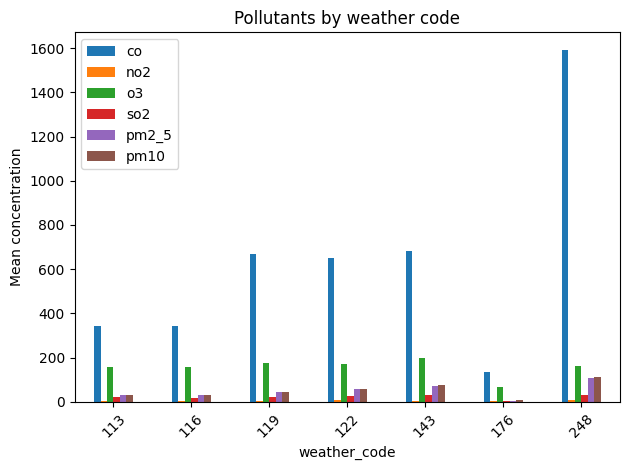

In [50]:
# compare mean air-pollutant concentrations across different weather conditions
pollutant_cols = ['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']
weather_poll = df.groupby('weather_code')[pollutant_cols].mean()

weather_poll.plot(kind="bar")
plt.ylabel("Mean concentration")
plt.title("Pollutants by weather code")
plt.xticks(rotation=45)
plt.tight_layout()
#save to output folder
plt.savefig("../output/Pollutant_by_weather.png", dpi=300, bbox_inches='tight')
plt.show()

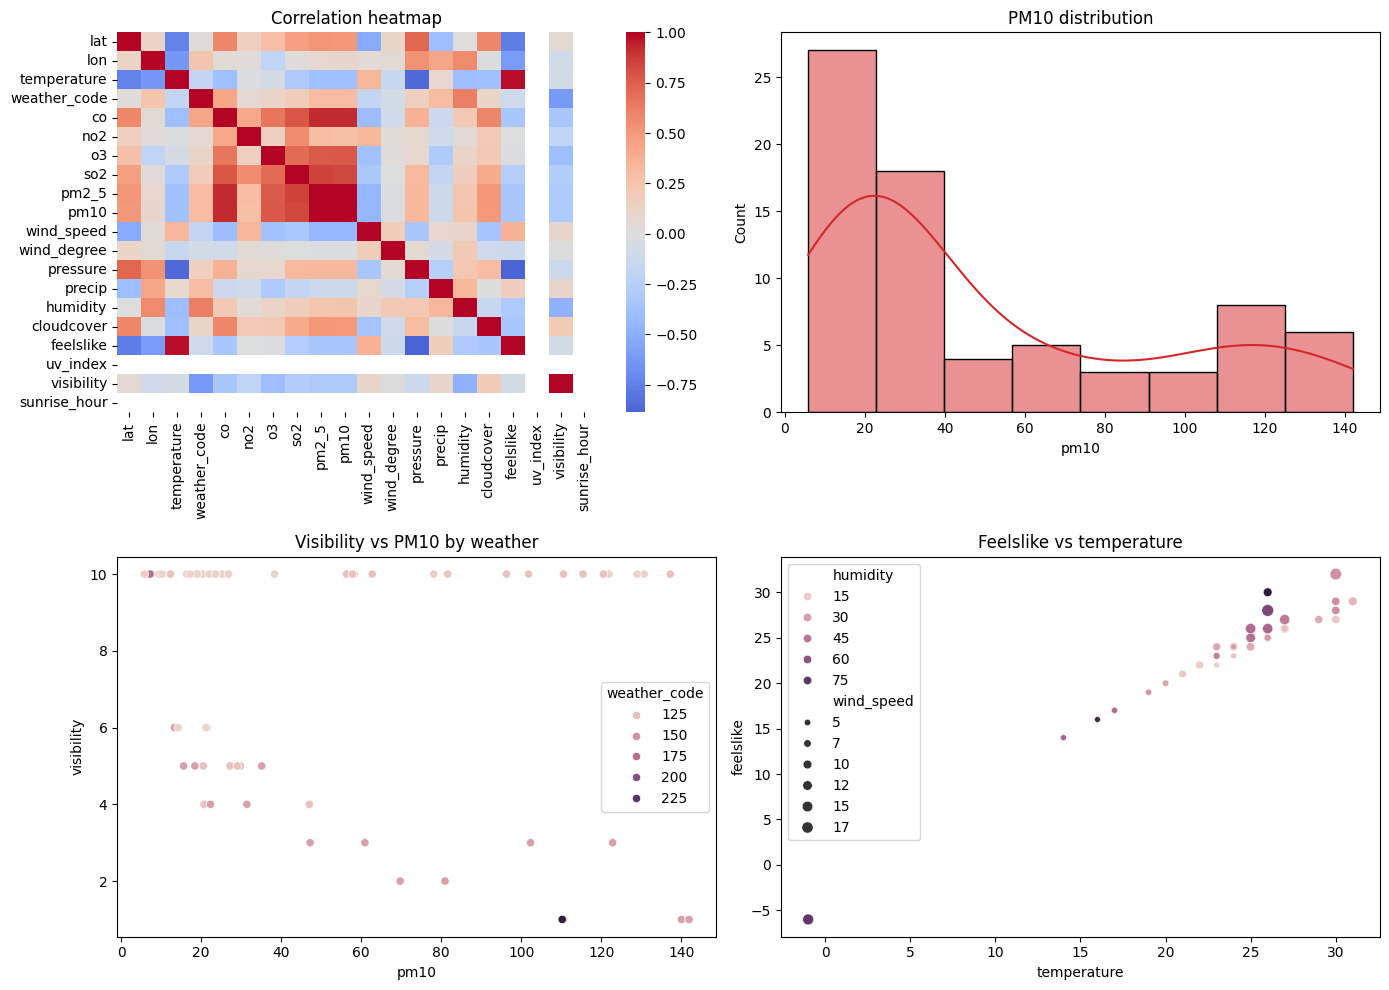

In [51]:
# combined exploratory plots showing correlations, distributions,and key weather-pollution relationships
fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.heatmap(corr, ax=axes[0,0], cmap="coolwarm", center=0)
axes[0,0].set_title("Correlation heatmap")

sns.histplot(df["pm10"], kde=True, ax=axes[0,1], color="tab:red")
axes[0,1].set_title("PM10 distribution")

sns.scatterplot(data=df, x="pm10", y="visibility", hue="weather_code",
                ax=axes[1,0])
axes[1,0].set_title("Visibility vs PM10 by weather")

sns.scatterplot(data=df, x="temperature", y="feelslike", hue="humidity",
                size="wind_speed", ax=axes[1,1])
axes[1,1].set_title("Feelslike vs temperature")

plt.tight_layout()
#save to output folder
plt.savefig("../output/Combined_exploratory_plots.png", dpi=300, bbox_inches='tight')
plt.show()
